# Workbook Setup

In [1]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

In [2]:
# Import data file
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Heart Disease predictor

Attempting to predict whether a patient has heart disease or not based on their medical attributes.

We're going to take the following approach:
* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## Problem Definition

Given medical atrributes can we predict whether a patient has heart disease or not

## Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## Evaluation

If we can attain 95% accuracy at predicting whether or not a patient as heart disease during the proof of concept, we will pursure the project

## Features

1. age - age in years
2. sex - GENDER(1 = male, 0 = female)
3. cp - chest pain type
   * 0 - Typical angina: chest pain related to decrease blood supply to the heart
   * 1 - Atypical angina: chest pain not related to the heart
   * 2 - Non-anginal pain: typically esophagael spasms (not heart related)
   * 3 - Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (typically in mm Hg on admission) above 130-140 is typically a concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2* triglycerids
   * above 200 is a cause for concern
6. fbs - fasting blood sugar (>120 mg/dl) (1 = True, 0 = False)
7. restech - resting electrocardiograph results:
   * 0 - nothing to note
   * 1 - ST-T wave abnormality
   * 2 - possible of definite left ventricular hypertrophy
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes, 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of the heart during exercise.
11. slope - slope of the peak exercise ST segment:
    * 0 - upsloping = better heart rate with exercise(uncommon)
    * 1 - flatsloping = minimal change(typically a healthy heart)
    * 2 - downsloping = signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flouroscopy:
    * colored vessel means blood can be seen flowing through
    * the more blood flow the better (no clots)
13. thal - thalium stress result:
    * 1,3 - normal
    * 6 - fixed defect - used to be defected but has been treated
    * 7 - reversable defect - no proper blood movement when exercising
14. target - has heart disease (1 = yes, 0 = no) (dependent variable)

# ANALYSIS

### Understanding the data

In [3]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

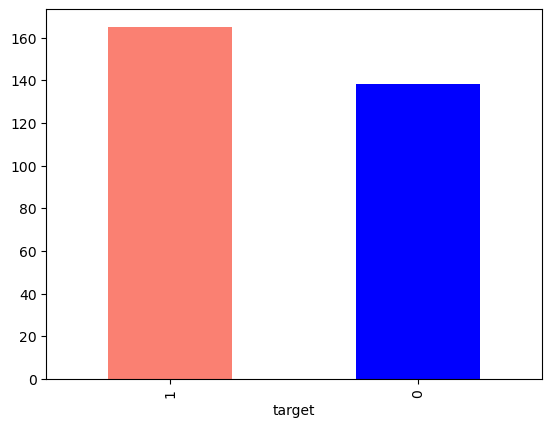

In [4]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'blue']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Look for patterns

### Sex for Heart Disease

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


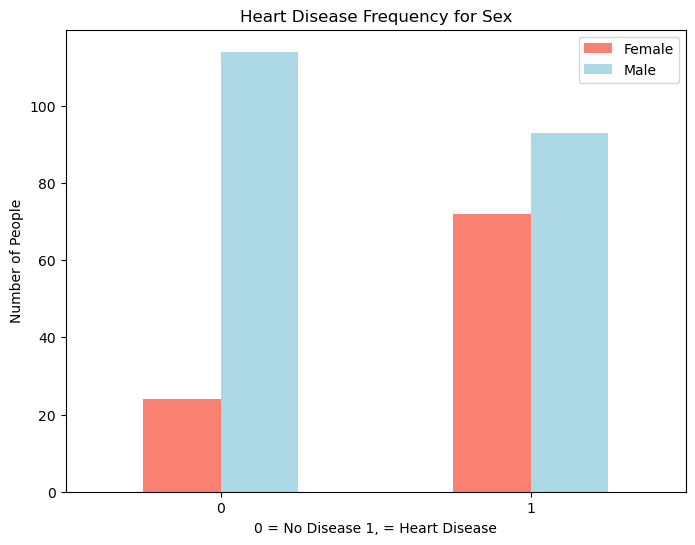

In [10]:
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (8,6),
                                    color = ['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.legend(['Female', 'Male'])
plt.xlabel('0 = No Disease 1, = Heart Disease')
plt.ylabel('Number of People')
plt.xticks(rotation = 0);

### Age vs Max Heart Rate for Heart Disease

In [11]:
df['thalach']

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

In [12]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

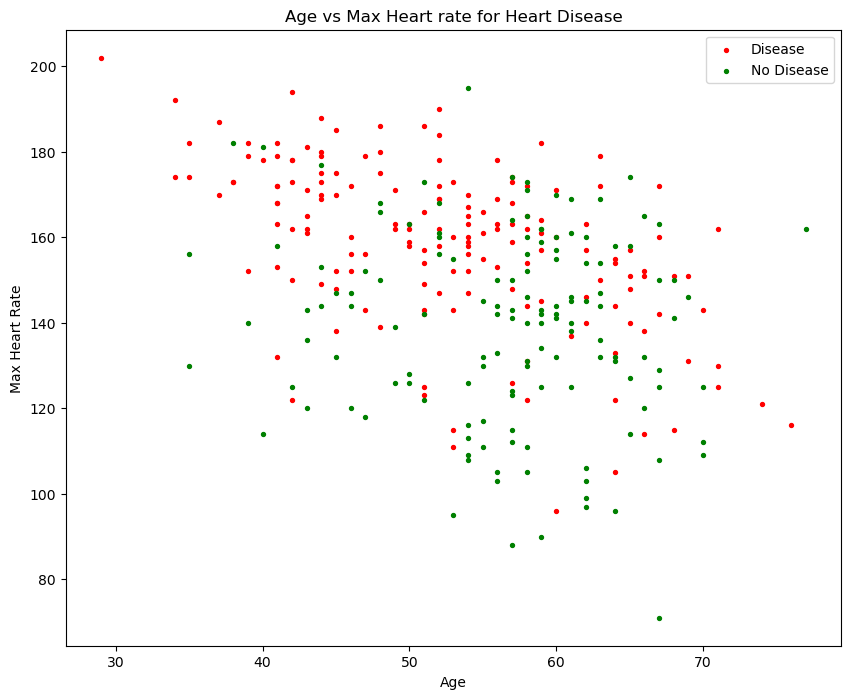

In [13]:
plt.figure(figsize = (10,8))
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = 'red',
            s = 8)

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'green',
            s = 8)
plt.title('Age vs Max Heart rate for Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

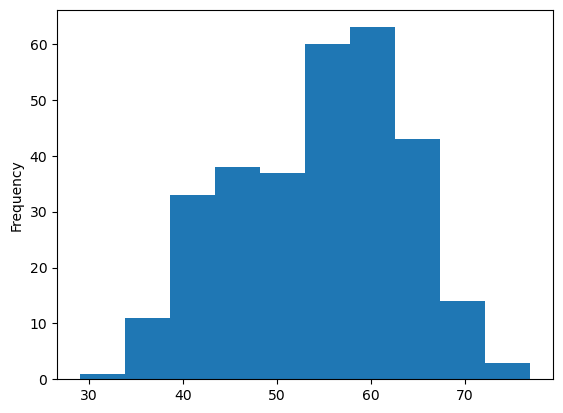

In [14]:
df['age'].plot.hist();

### Exercise Induced Angina for heart Disease

In [15]:
df.exang

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exang, Length: 303, dtype: int64

In [16]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [17]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


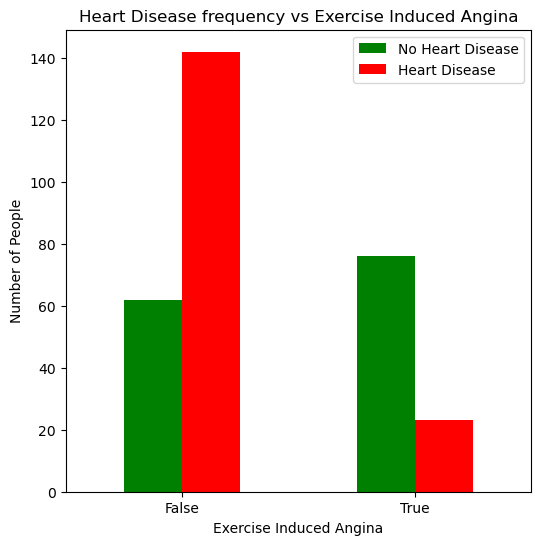

In [18]:
pd.crosstab(df.exang, df.target).plot(kind = 'bar',
                                      figsize = (6,6),
                                      color = ['green', 'red'])

plt.title('Heart Disease frequency vs Exercise Induced Angina')
plt.ylabel('Number of People')
plt.xlabel('Exercise Induced Angina')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation = 0, ticks = [0,1], labels = ['False', 'True']);

### Chest Pain Type for Heart Disease

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.cp

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

In [21]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


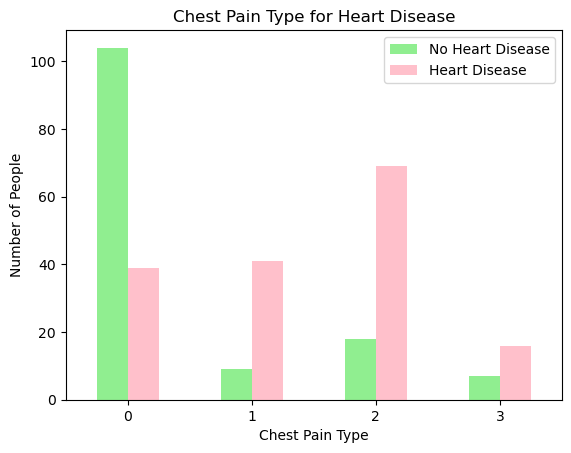

In [22]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   color = ['lightgreen', 'pink'])

plt.title('Chest Pain Type for Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of People')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation = 0);

### Correlation Matrix

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


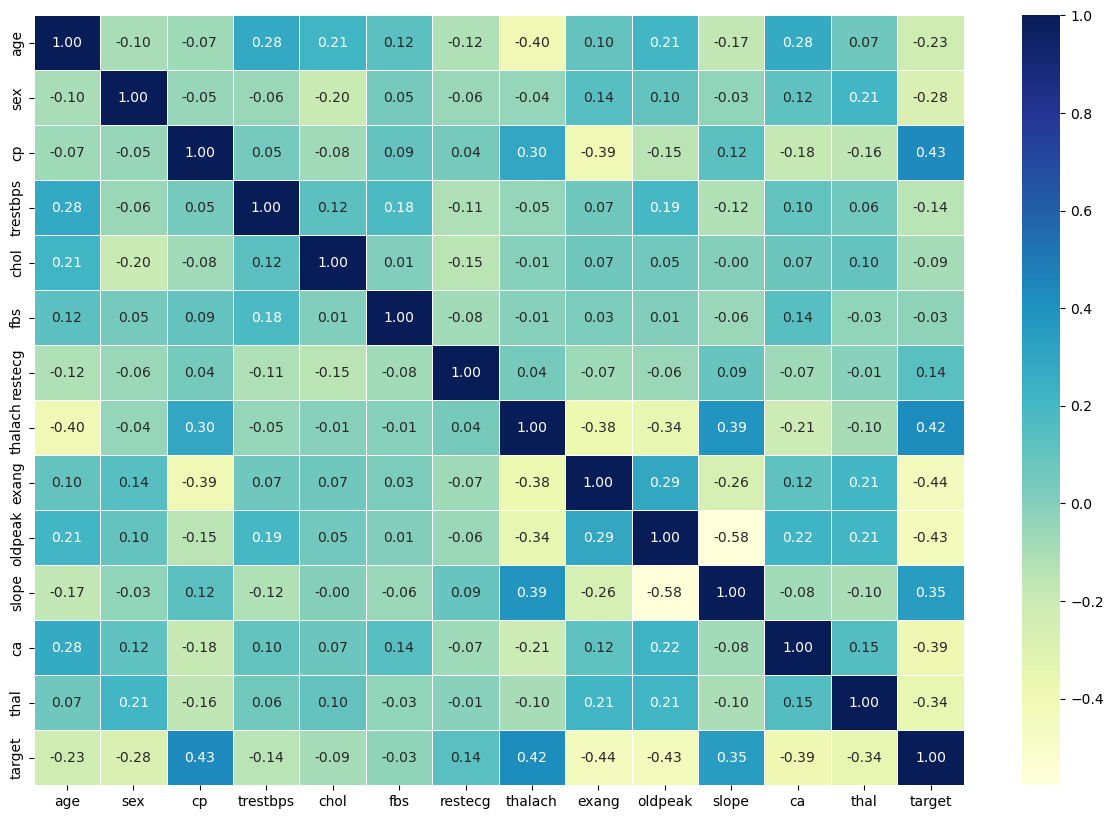

In [24]:
# Visualizing the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");

# Modelling

## Data Prepearation

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = df.drop('target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Model Testing

Testing out different models

In [29]:
models = {"Logistic Regression" : LogisticRegression(),
          "K Nearest Neighbor" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

In [30]:
def fit_score(models, X_train, X_test, y_train, y_test) -> dict:
    """
    Funtion to fit and evaluates a number of given models for classification problems.
    Takes input
    models : A dictionary of models
    X_train : Training data (no labels)
    X_test : Testing data (no labels)
    y_train : Training labels
    y_test : Testing labels
    """
    np.random.seed(13)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\project\projectenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'K Nearest Neighbor': 0.639344262295082,
 'Random Forest': 0.819672131147541}

In [32]:
# Visualizing the comparision between models
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare

,Logistic Regression,K Nearest Neighbor,Random Forest
Accuracy,0.836066,0.639344,0.819672


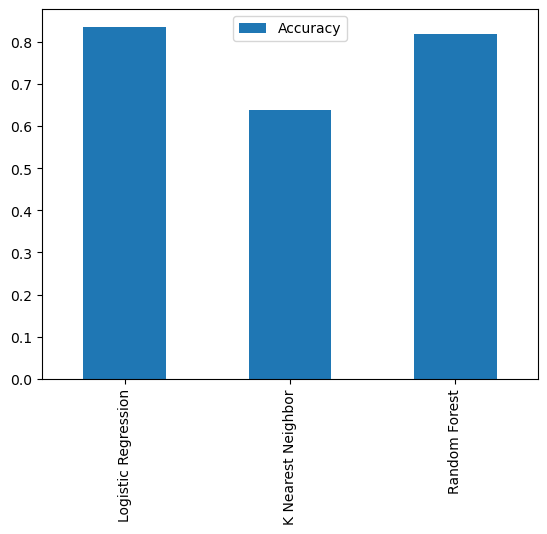

In [33]:
model_compare.T.plot.bar();

## Model Tuning

### K Nearest Neighbor

In [34]:
train_scores = []
test_scores = []
nneighbors = range(1,21)

In [35]:
knn = KNeighborsClassifier()
np.random.seed(13)
for i in nneighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [36]:
train_scores

[1.0,
 0.8016528925619835,
 0.8057851239669421,
 0.7603305785123967,
 0.768595041322314,
 0.7355371900826446,
 0.7396694214876033,
 0.71900826446281,
 0.7024793388429752,
 0.6900826446280992,
 0.7107438016528925,
 0.6859504132231405,
 0.7024793388429752,
 0.6776859504132231,
 0.6942148760330579,
 0.6859504132231405,
 0.6694214876033058,
 0.6859504132231405,
 0.7024793388429752,
 0.7066115702479339]

In [37]:
test_scores

[0.6065573770491803,
 0.4426229508196721,
 0.5737704918032787,
 0.5409836065573771,
 0.639344262295082,
 0.6557377049180327,
 0.6065573770491803,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869]

Maximum score obtained on test data = 73.77%


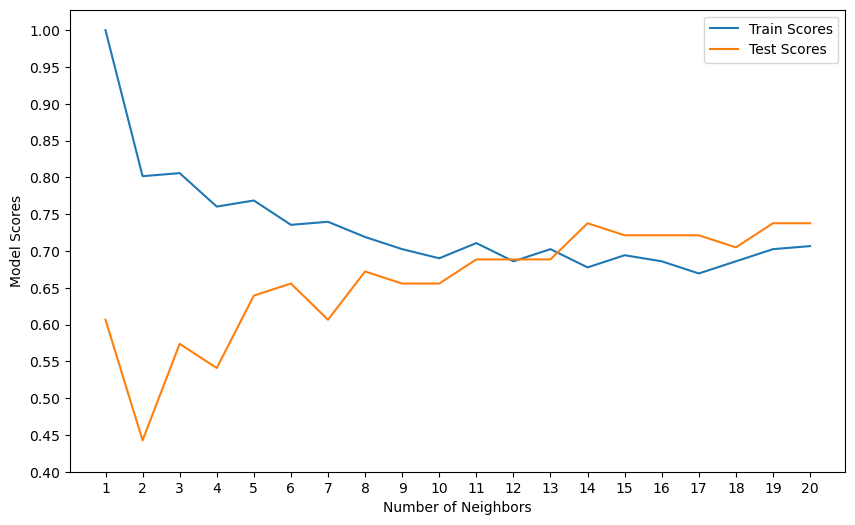

In [38]:
plt.figure(figsize = (10,6))
plt.plot(nneighbors, train_scores, label = 'Train Scores')
plt.plot(nneighbors, test_scores, label = 'Test Scores')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Scores')
plt.xticks(range(1, 21, 1))
plt.yticks([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
plt.legend();
print(f'Maximum score obtained on test data = {max(test_scores)*100:.2f}%')

### Logistic Regression and Random Forest using RandomizedSearchCV

In [39]:
reg_grid = {'C' : np.logspace(-4, 4, 20),
            'solver' : ['liblinear','lbfgs']}
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)} 

In [40]:
np.random.seed(13)
search_reg_grid = RandomizedSearchCV(LogisticRegression(max_iter = 2000),
                                     param_distributions = reg_grid,
                                     n_iter = 10,
                                     cv = 5,
                                     verbose = True)
search_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [41]:
search_reg_grid.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [42]:
search_reg_grid.score(X_test, y_test)

0.8688524590163934

In [43]:
np.random.seed(13)
search_rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                                    param_distributions = rf_grid,
                                    cv = 5,
                                    n_iter = 25,
                                    verbose = True)
search_rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
search_rf_grid.best_params_

{'n_estimators': 610,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [45]:
search_rf_grid.score(X_test, y_test)

0.8360655737704918

### Logistic Regression using GridSearchCV

In [46]:
np.random.seed(13)
log_grid = {'C' : np.logspace(-5, 5, 25),
            'solver' : ['liblinear', 'lbfgs', 'saga']}

gsearch_log_grid = GridSearchCV(LogisticRegression(max_iter = 10000),
                                param_grid = log_grid,
                                cv = 5,
                                verbose = 2)
gsearch_log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..........................C=1e-05, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=1e-05, solver=saga; total time=   0.0s
[CV] END ...............................C=1e-05

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-05, 2.61015722e-05, 6.81292069e-05, 1.77827941e-04,
       4.64158883e-04, 1.21152766e-03, 3.16227766e-03, 8.25404185e-03,
       2.15443469e-02, 5.62341325e-02, 1.46779927e-01, 3.83118685e-01,
       1.00000000e+00, 2.61015722e+00, 6.81292069e+00, 1.77827941e+01,
       4.64158883e+01, 1.21152766e+02, 3.16227766e+02, 8.25404185e+02,
       2.15443469e+03, 5.62341325e+03, 1.46779927e+04, 3.83118685e+04,
       1.00000000e+05]),
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             verbose=2)

In [47]:
gsearch_log_grid.best_params_

{'C': 2.6101572156825386, 'solver': 'liblinear'}

In [48]:
gsearch_log_grid.score(X_test, y_test)

0.819672131147541

In [49]:
log_grid2 = {'C' : np.logspace(-4, 4, 40),
             'solver' : ['liblinear'],
             'intercept_scaling' : np.arange(1, 20, 1)}

gsearch_log_grid2 = GridSearchCV(LogisticRegression(max_iter = 10000),
                                 param_grid = log_grid2,
                                 cv = 5,
                                 verbose = 2)
gsearch_log_grid2.fit(X_train, y_train)

Fitting 5 folds for each of 760 candidates, totalling 3800 fits
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=3, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=3, s

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.0702906...
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'intercept_scaling': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'solver': ['liblinear']},
             verbose=2)

In [50]:
gsearch_log_grid2.best_params_

{'C': 2.030917620904735, 'intercept_scaling': 1, 'solver': 'liblinear'}

In [51]:
gsearch_log_grid2.score(X_test, y_test)

0.819672131147541

In [52]:
np.random.seed(13)
log_grid3 = {'C' : np.logspace(-8, 8, 40),
             'solver' : ['liblinear']}

gsearch_log_grid3 = GridSearchCV(LogisticRegression(max_iter = 10000),
                                 param_grid = log_grid2,
                                 cv = 5,
                                 verbose = 2)
gsearch_log_grid3.fit(X_train, y_train)

Fitting 5 folds for each of 760 candidates, totalling 3800 fits
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=3, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, intercept_scaling=3, s

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.0702906...
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'intercept_scaling': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'solver': ['liblinear']},
             verbose=2)

In [53]:
gsearch_log_grid3.best_params_

{'C': 2.030917620904735, 'intercept_scaling': 1, 'solver': 'liblinear'}

In [54]:
gsearch_log_grid3.score(X_test, y_test)

0.819672131147541

### Choosing a model

In [55]:
np.random.seed(13)
model = LogisticRegression(C = 2.030917620904735,
                          solver = 'liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=2.030917620904735, solver='liblinear')

In [56]:
model.score(X_test, y_test)

0.819672131147541

## Model Evauation

### Receiver Operating Characteristics(ROC) curve and Area under curve(AUC)

In [57]:
y_preds = model.predict(X_test)

In [58]:
y_score = model.predict_proba(X_test)[:,1]
y_score

array([0.14509273, 0.97399095, 0.97104483, 0.9018043 , 0.62065993,
       0.04399501, 0.24093323, 0.12824152, 0.65216037, 0.40580261,
       0.46741563, 0.81588826, 0.19483277, 0.31986385, 0.88309614,
       0.55290264, 0.75872717, 0.21713593, 0.43294307, 0.01880543,
       0.38668423, 0.1251509 , 0.95238521, 0.00313782, 0.90628309,
       0.92917679, 0.977589  , 0.70898495, 0.02731488, 0.01931996,
       0.69026729, 0.03066745, 0.09441299, 0.96462935, 0.37714672,
       0.10039633, 0.83376654, 0.24060565, 0.60185477, 0.5782933 ,
       0.97923848, 0.50473595, 0.18014737, 0.80697017, 0.21214757,
       0.79655129, 0.64989614, 0.08419923, 0.86768323, 0.60434129,
       0.92642633, 0.02319679, 0.98797114, 0.64052544, 0.97360266,
       0.1055987 , 0.05351981, 0.95094564, 0.78139679, 0.92639539,
       0.9601496 ])

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
fpr

array([0.        , 0.        , 0.        , 0.03846154, 0.03846154,
       0.07692308, 0.07692308, 0.11538462, 0.11538462, 0.15384615,
       0.15384615, 0.23076923, 0.23076923, 0.34615385, 0.34615385,
       0.69230769, 0.69230769, 1.        ])

In [60]:
roc_score = roc_auc_score(y_test, y_score)

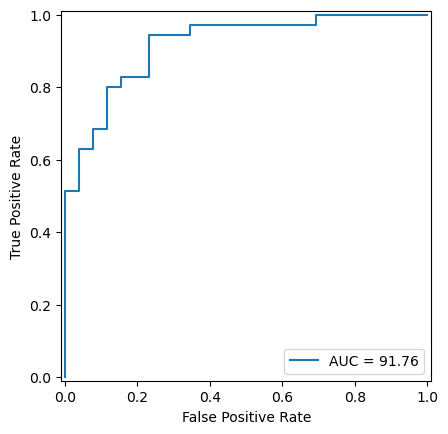

In [61]:
RocCurveDisplay(fpr = fpr,
                tpr = tpr,
                roc_auc = roc_score*100).plot();

### Confusion Matrix

In [62]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    y_test : true labels
    y_preds : predicted data
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot= True, # Annotate the boxes
                     cbar= False,
                     cmap = 'coolwarm')
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

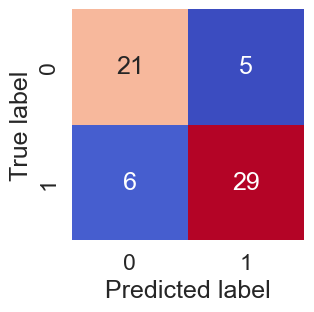

In [63]:
plot_conf_mat(y_test, y_preds)

### Classification report and cross-validation evaluation

In [64]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.83      0.84        35

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [65]:
cv_acc = np.mean(cross_val_score(model, X, y, cv= 5, scoring = 'accuracy')) #accuracy scoring
cv_prec = np.mean(cross_val_score(model, X, y, cv= 5, scoring = 'precision')) #precision scoring
cv_f1 = np.mean(cross_val_score(model, X, y, cv=5, scoring = 'f1')) #f1 score
cv_recall = np.mean(cross_val_score(model, X, y, cv= 5, scoring = 'recall')) #recall score

In [66]:
print(f'Cross-validated evaluation metrics are:-\n Accuracy = {cv_acc*100:.2f} \n Precision = {cv_prec*100:.2f} \n Recall = {cv_recall*100:.2f} \n F1 = {cv_f1*100:.2f}')

Cross-validated evaluation metrics are:-
 Accuracy = 82.49 
 Precision = 81.88 
 Recall = 87.88 
 F1 = 84.64


In [67]:
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                           'Precision' : cv_prec,
                           'Recall' : cv_recall,
                           'F1' : cv_f1},
                         index = [0])

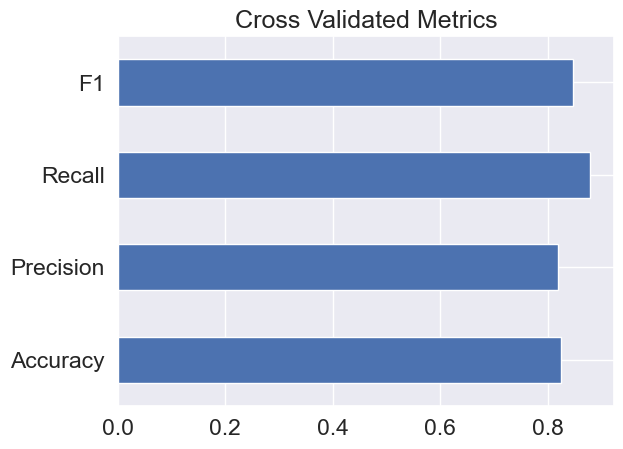

In [68]:
cv_metrics.T.plot(kind = "barh",
                  title = 'Cross Validated Metrics',
                  legend = False)
plt.xticks(rotation = 0);

## Feature Importance

In [69]:
model.coef_

array([[-0.00402096, -1.55302153,  0.6895558 , -0.01109551, -0.00234296,
         0.28430792,  0.65732261,  0.02658863, -0.92399499, -0.49786294,
         0.5826007 , -0.63997481, -0.89950577]])

In [70]:
feature_df = pd.DataFrame(model.coef_, columns = X.columns, index = [0])

In [71]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.004021,-1.553022,0.689556,-0.011096,-0.002343,0.284308,0.657323,0.026589,-0.923995,-0.497863,0.582601,-0.639975,-0.899506


(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 [Text(-2.0, 0, '−2.0'),
  Text(-1.5, 0, '−1.5'),
  Text(-1.0, 0, '−1.0'),
  Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0')])

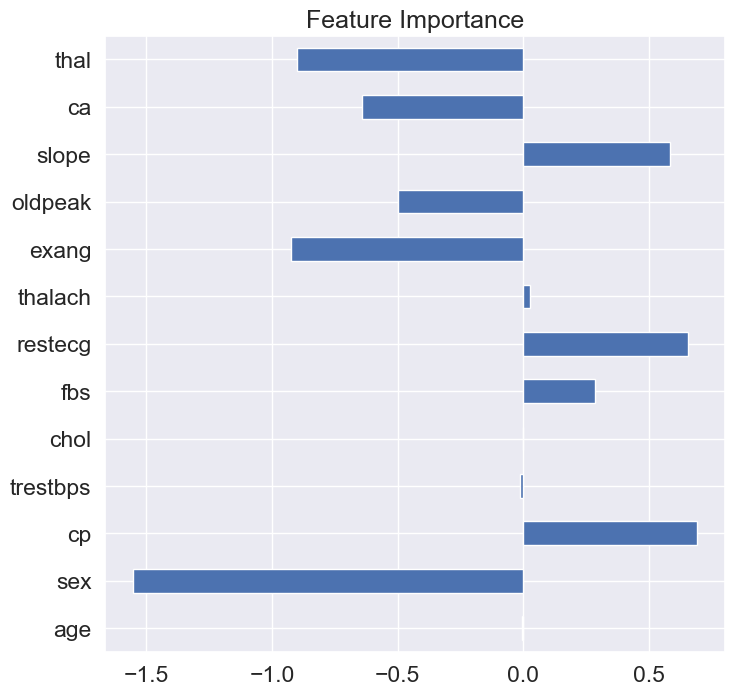

In [72]:
feature_df.T.plot(kind = 'barh',
                title = 'Feature Importance',
                figsize = (8,8),
                legend = None)
plt.xticks(rotation = 0)